In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [27]:
proton_mass = 1.67E-27
m = 9*proton_mass
q = e = 1.6E-19

# Valeurs par défaut
B = 2.435 # Tesla
Q = -300/1E-2**2 # 300V/cm^2

In [28]:
def acceleration(r, v, q=q, Q=Q, B=B, m=m):
    x, y, z = r
    E = -Q*np.array([x, y, -2*z])
    B_vec = np.array([0, 0, B])
    F = q*(E + np.cross(v, B_vec))
    return F/m

r_0 = np.array([10E-6, 0, 0])
v_0 = np.array([100, 0, 0])

acceleration(r_0, v_0)

array([ 3.19361277e+08, -2.59214904e+09,  0.00000000e+00])

In [29]:
def f(t, y, q=q, Q=Q, B=B, m=m):
    r = y[:3]
    v = y[3:]
    a = acceleration(r, v, q=q, Q=Q, B=B, m=m)
    return np.concatenate((v, a))

def trajectoire(r_0, v_0, t_array, q=q, Q=Q, B=B, m=m):
    y_0 = np.concatenate((r_0, v_0))
    t_f = t_array[-1]
    res = solve_ivp(f, [0, t_f], y0=y_0, t_eval=t_array, args=(q, Q, B, m))
    return res.y

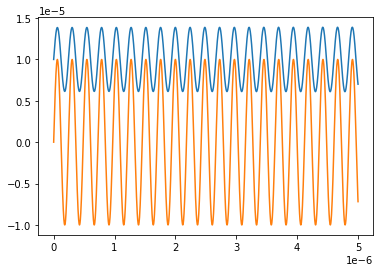

In [30]:
t_f = 5E-6
t_array = np.linspace(0, t_f, 2000)
x, y, z, v_x, v_y, v_z = trajectoire(r_0, v_0, t_array, Q=0)

plt.plot(t_array, x)

omega = q*B/m

plt.plot(t_array, 1E-5*np.sin(omega*t_array))

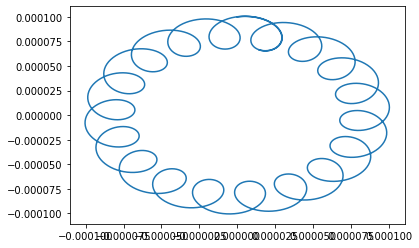

In [34]:
t_f = 5E-6
t_array = np.linspace(0, t_f, 2000)

r_0 = np.array([0, 100E-6, 0])
v_0 = np.array([500, 100, 1])



x, y, z, v_x, v_y, v_z = trajectoire(r_0, v_0, t_array)

plt.plot(x, y)


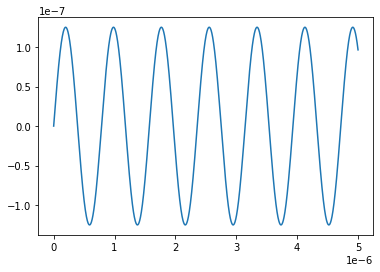

In [35]:
plt.plot(t_array, z)


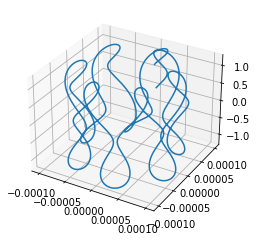

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot(x, y, z)